### REGRESION LINEAL: minimiza la distancia vertical con respecto a la recta de regresion, por lo tanto considera los valores (y_real - y_prediccion)

### REGRESION LINEAL DEMING: minimiza la distancia perpendicular con respecto a la recta de regresion por lo tanto considera los valores (x_real - x_prediccion), (y_real - y_prediccion)

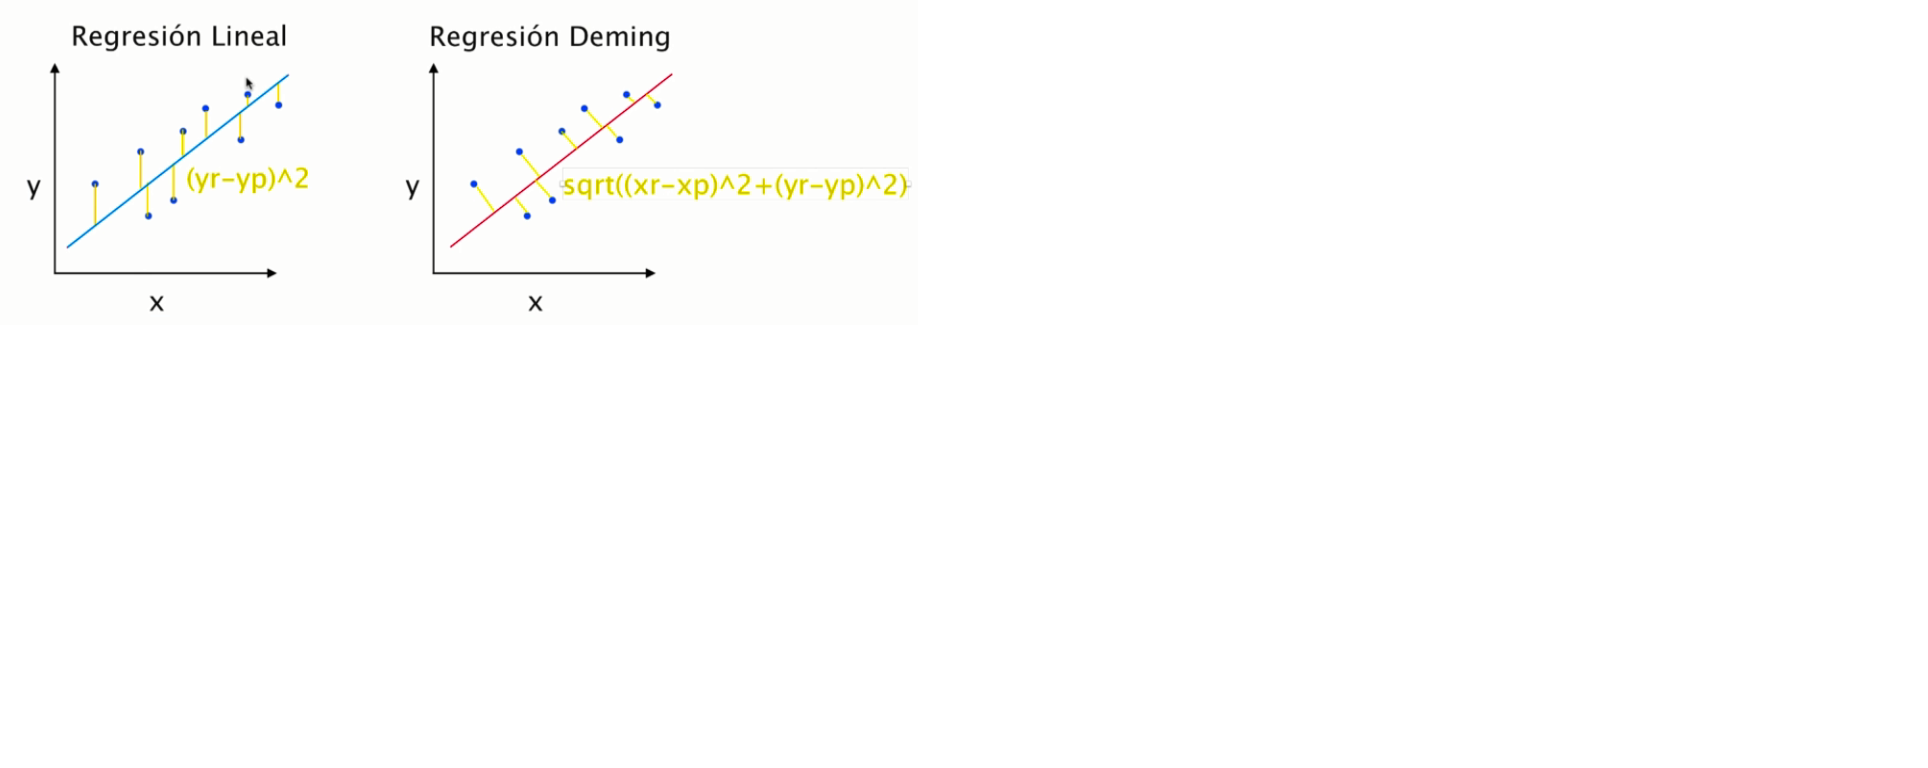

In [16]:
from IPython.display import Image
Image(filename="regresion lineal vs regresion lineal deming.png")


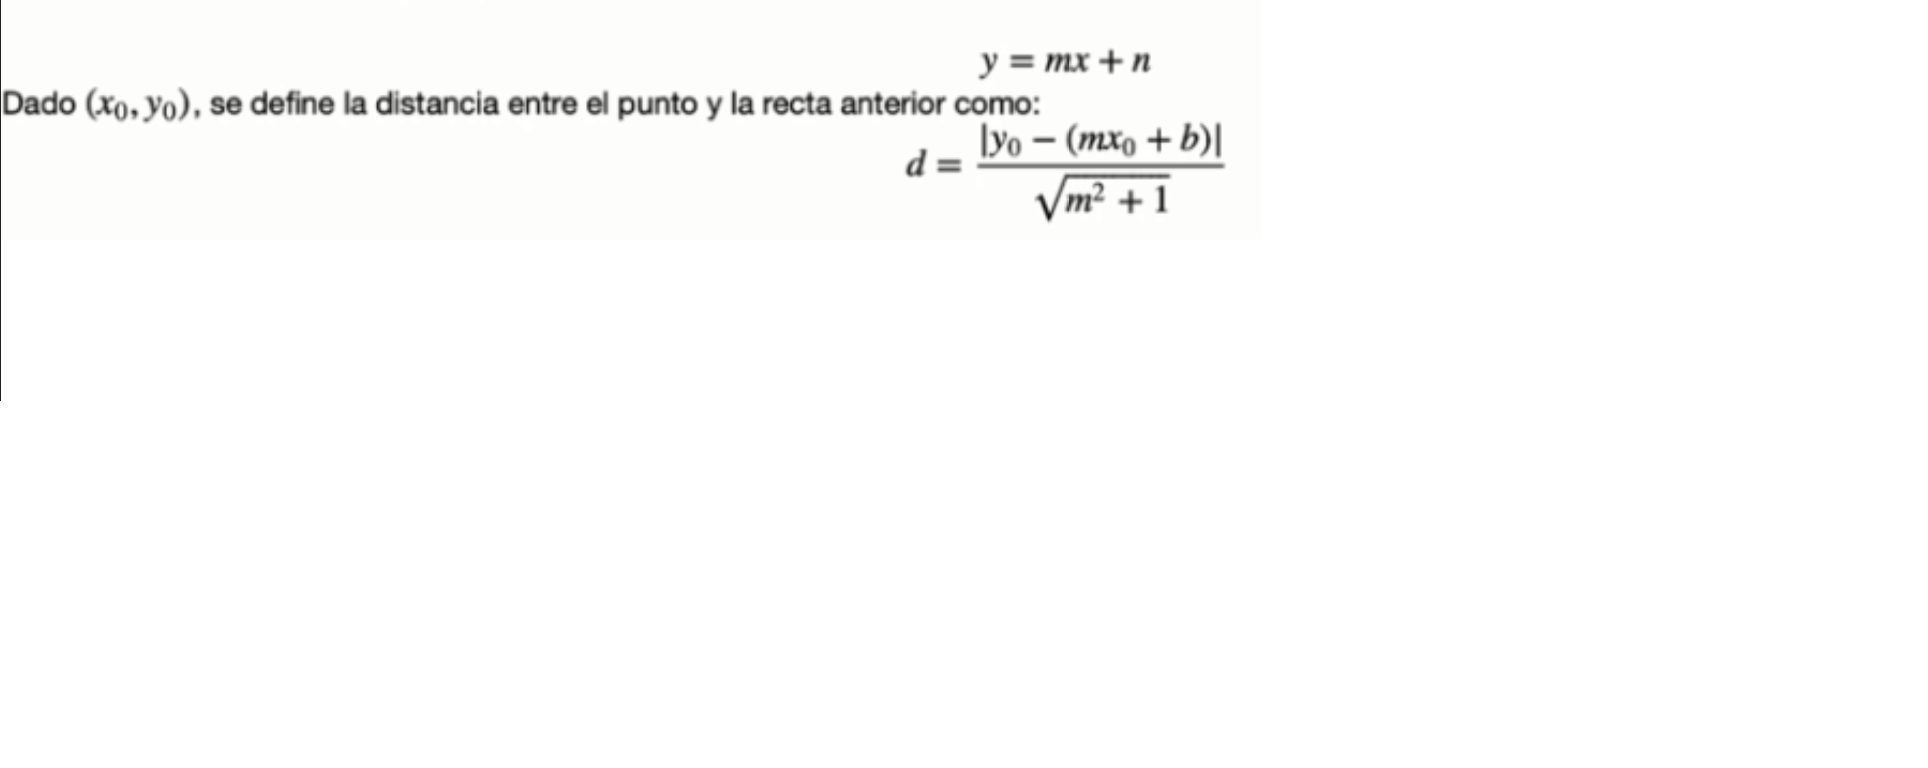

In [17]:
from IPython.display import Image
Image(filename="formula de la distancia perpendicular- regresion deming.png")

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [20]:
import tensorflow as tf
session = tf.Session()

## carga y manipulacion de datos

In [21]:
iris = datasets.load_iris()

In [22]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

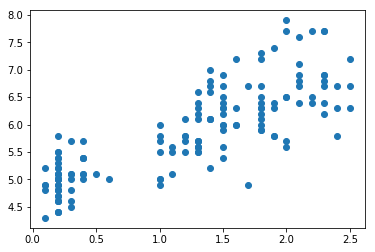

In [23]:
plt.plot(x_vals, y_vals, "o", label="Datos originales") ##los datos tienen cierta tendencia lineal
plt.show()

## se declaran los placeholders

In [24]:
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

## se declaran las variables

In [25]:
m = tf.Variable(tf.random_normal(shape=[1,1]))
n = tf.Variable(tf.random_normal(shape=[1,1]))

## se define el batch_size

In [26]:
batch_size = 25

## creacion del modelo
     y = mx + n

In [27]:
prediccion = tf.add(tf.matmul(x_data, m), n)

## funcion de perdidas (con distancia deming)

In [28]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, m), n)))
deming_den = tf.sqrt(tf.add(tf.square(m),1.))
loss_deming = tf.reduce_mean(tf.truediv(deming_num, deming_den))

## se define el optimizador con propagacion hacia atras

In [29]:
optimizador = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = optimizador.minimize(loss_deming)

## inicializar las variables

In [30]:
init = tf.global_variables_initializer()
session.run(init)

## entrenamiento del modelo

In [31]:
loss_vect = []
for i in range(300):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = session.run(loss_deming, feed_dict={x_data:rand_x, y_target:rand_y}) ##loss temporales
    loss_vect.append(temp_loss)
    if(i+1)%20==0:
        print("paso= "+str(i+1) + "  m=" +str(session.run(m))+"  n="+str(session.run(n))+ "  loss= "+str(temp_loss))

paso= 20  m=[[2.9665759]]  n=[[0.6240643]]  loss= 0.5818834
paso= 40  m=[[3.1837747]]  n=[[0.77753186]]  loss= 0.42752898
paso= 60  m=[[3.3220692]]  n=[[0.8927912]]  loss= 0.4455406
paso= 80  m=[[3.4257538]]  n=[[0.99632144]]  loss= 0.507226
paso= 100  m=[[3.4699955]]  n=[[1.060962]]  loss= 0.53924596
paso= 120  m=[[3.4902363]]  n=[[1.1117272]]  loss= 0.43294227
paso= 140  m=[[3.4962218]]  n=[[1.1491832]]  loss= 0.46762055
paso= 160  m=[[3.4935267]]  n=[[1.1822575]]  loss= 0.48423532
paso= 180  m=[[3.4674022]]  n=[[1.1988639]]  loss= 0.55814683
paso= 200  m=[[3.4441648]]  n=[[1.21775]]  loss= 0.5060093
paso= 220  m=[[3.4312239]]  n=[[1.2456682]]  loss= 0.42714554
paso= 240  m=[[3.4320765]]  n=[[1.2860358]]  loss= 0.3870878
paso= 260  m=[[3.4049652]]  n=[[1.2995327]]  loss= 0.5275353
paso= 280  m=[[3.375905]]  n=[[1.3130684]]  loss= 0.4374985
paso= 300  m=[[3.346104]]  n=[[1.3291548]]  loss= 0.4051514


In [32]:
## se obtienen los valores de "m" y de "n"
[[slope]] = session.run(m)
[[intercept]] = session.run(n)

## el modelo lineal deming seria este

In [33]:
print(str(slope)+"x + "+str(intercept))

3.346104x + 1.3291548


## representacion grafica de la prediccion

In [34]:
## recta de regresion de la prediccion
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

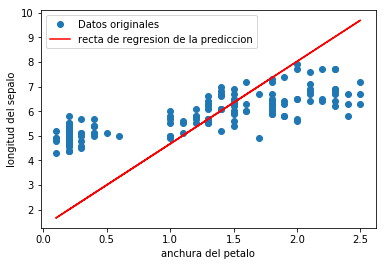

In [35]:
plt.plot(x_vals, y_vals, "o", label="Datos originales")
plt.plot(x_vals, best_fit, "r-", label="recta de regresion de la prediccion")
plt.legend(loc="upper left")
plt.xlabel("anchura del petalo")
plt.ylabel("longitud del sepalo")
plt.show()

## grafico que muestra como fue convergiendo la funcion de perdidas

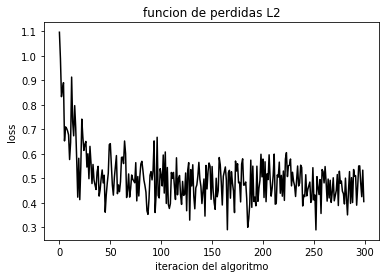

In [36]:
plt.plot(loss_vect, "k-")
plt.title("funcion de perdidas L2")
plt.xlabel("iteracion del algoritmo")
plt.ylabel("loss")
plt.show()